# Analisis Data Pengguna WiFi di Kota Bandung

### by: Nadia Fitriana Latifah

#### Dalam analisis ini digunakan data real dari pemerintah Kota Bandung tentang jumlah pengguna WiFi pada tahun 2017, serta dilakukan prediksi mengenai perubahan jumlah pengguna WiFi pada tahun 2018.

#### Pada analisis data ini dibagi menjadi 6 sub-bab, yang meliputi: 
#### 1. Data preparation
#### 2. Data cleansing
#### 3. Plotting lokasi menggunakan GeoPlot dan Exploration Data Analyst (EDA)
#### 4. Prediksi untuk Telco business untuk 1 tahun
#### 5. Evaluasi

## 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set(color_codes=True)

import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_wifi=pd.read_csv("Data Pengguna WiFi di Kota Bandung Tahun 2017.csv")
data_wifi=data_wifi.dropna()
data_wifi

nama_lokasi                                             alamat  \
0   Alun alun Ujungberung  Jl. Kaum Kaler, Cigending, Ujung Berung, Kota ...   
1                   Andir  Jl. Srigunting Raya No.1, Sumur Bandung, Garud...   
2                Antapani  Jl. A.H. Nasution No.14, Jatihandap, Mandalaja...   
3               Arcamanik  Jl. Cisaranten Kulon, Cisaranten Kulon, Arcama...   
4            Astana Anyar  Jalan Bojongloa No. 69, Astanaanyar, Panjunan,...   
..                    ...                                                ...   
90      Teras Cikapundung  Taman Teras Cikapundung, Jalan Siliwangi, Cite...   
91      Terminal Cicaheum   Cicaheum, Kiaracondong, Kota Bandung, Jawa Barat   
92  Terminal Leuwipanjang  Jalan Leuwi Panjang, Situsaeur, Bojongloa Kidu...   
93           Ujung Berung  Jl. Alun - Alun Utara No. 211, Ujungberung, Ci...   
94     Union Jack Pitcher                       Setrasari Mall Blok B4 No 64   

                 deskripsi  longitude  latitude  January  February  March  \
0                        -    107.701   -6.9131     1037       953    974   
1          Kecamatan Andir    107.575   -6.9127        0         0      7   
2       Kecamatan Antapani    107.663   -6.9109        0         0     39   
3      Kecamatan Arcamanik    107.685   -6.9181        0         0      0   
4   Kecamatan Astana Anyar    107.600   -6.9319        0         0     27   
..                     ...        ...       ...      ...       ...    ...   
90                       -    107.607   -6.8845      884      1046   1022   
91                       -    107.657   -6.9023      740       737    713   
92                       -    107.593   -6.9463     1379      1064   1457   
93  Kecamatan Ujung Berung      0.000    0.0000        0         0     28   
94                       -      0.000    0.0000        0         0      0   

    April   May  June  July  August  September  October  November  December  \
0     819  1132   991   592     858        493      737       571       590   
1     116   205   206   329     387        526      424       365         3   
2     151   135    99   246     203        182      184       145       149   
3     217   376   412   422     423        336      333       147        92   
4     173   159    83   119      47          0        3        81       186   
..    ...   ...   ...   ...     ...        ...      ...       ...       ...   
90   1100  1214   729   968     967        925      804       617       763   
91    850   963   957   564     851        861      700       746       846   
92   1235  1410  1395  1439    1373       1115     1568      1530      1309   
93    106    99    64   144      61         75       48        67        58   
94      3    27    10    33      56         33       37        98        96   

    Grand Total  
0          9747  
1          2568  
2          1533  
3          2758  
4           878  
..          ...  
90        11039  
91         9528  
92        16274  
93          750  
94          393  

[95 rows x 18 columns]

In [3]:
data_wifi.head()

nama_lokasi                                             alamat  \
0  Alun alun Ujungberung  Jl. Kaum Kaler, Cigending, Ujung Berung, Kota ...   
1                  Andir  Jl. Srigunting Raya No.1, Sumur Bandung, Garud...   
2               Antapani  Jl. A.H. Nasution No.14, Jatihandap, Mandalaja...   
3              Arcamanik  Jl. Cisaranten Kulon, Cisaranten Kulon, Arcama...   
4           Astana Anyar  Jalan Bojongloa No. 69, Astanaanyar, Panjunan,...   

                deskripsi  longitude  latitude  January  February  March  \
0                       -    107.701   -6.9131     1037       953    974   
1         Kecamatan Andir    107.575   -6.9127        0         0      7   
2      Kecamatan Antapani    107.663   -6.9109        0         0     39   
3     Kecamatan Arcamanik    107.685   -6.9181        0         0      0   
4  Kecamatan Astana Anyar    107.600   -6.9319        0         0     27   

   April   May  June  July  August  September  October  November  December  \
0    819  1132   991   592     858        493      737       571       590   
1    116   205   206   329     387        526      424       365         3   
2    151   135    99   246     203        182      184       145       149   
3    217   376   412   422     423        336      333       147        92   
4    173   159    83   119      47          0        3        81       186   

   Grand Total  
0         9747  
1         2568  
2         1533  
3         2758  
4          878

In [4]:
data_wifi.shape

(95, 18)

## 2. Data Cleansing

In [5]:
data_wifi=data_wifi.drop(columns=['alamat','deskripsi']) #menghapus kolom alamat dan deskripsi

In [6]:
data_wifi.head()

nama_lokasi  longitude  latitude  January  February  March  \
0  Alun alun Ujungberung    107.701   -6.9131     1037       953    974   
1                  Andir    107.575   -6.9127        0         0      7   
2               Antapani    107.663   -6.9109        0         0     39   
3              Arcamanik    107.685   -6.9181        0         0      0   
4           Astana Anyar    107.600   -6.9319        0         0     27   

   April   May  June  July  August  September  October  November  December  \
0    819  1132   991   592     858        493      737       571       590   
1    116   205   206   329     387        526      424       365         3   
2    151   135    99   246     203        182      184       145       149   
3    217   376   412   422     423        336      333       147        92   
4    173   159    83   119      47          0        3        81       186   

   Grand Total  
0         9747  
1         2568  
2         1533  
3         2758  
4          878

In [7]:
for i in range (len(data_wifi)): #mencari lokasi yang mempunyai Grand Total=0
    if data_wifi['Grand Total'][i]==0:
        print('Indeks ke-',i,end=' : ')
        print(data_wifi['nama_lokasi'][i])

Indeks ke- 26 : Dinas Perpustakaan dan Kearsipan
Indeks ke- 50 : morebit
Indeks ke- 61 : Stasiun Bandung
Indeks ke- 62 : Stasiun Kiaracondong


In [8]:
for i in range(len(data_wifi)): 
    if data_wifi['Grand Total'][i]==0: #mengapus baris yang mempunyai Grand Total=0
        data_wifi=data_wifi.drop([i]) 
        
data_wifi=data_wifi.reset_index(drop=True) #mereset urutan index setelah baris Grand Total=0 dihapus       

In [9]:
data_wifi

nama_lokasi  longitude  latitude  January  February  March  \
0   Alun alun Ujungberung    107.701   -6.9131     1037       953    974   
1                   Andir    107.575   -6.9127        0         0      7   
2                Antapani    107.663   -6.9109        0         0     39   
3               Arcamanik    107.685   -6.9181        0         0      0   
4            Astana Anyar    107.600   -6.9319        0         0     27   
..                    ...        ...       ...      ...       ...    ...   
86      Teras Cikapundung    107.607   -6.8845      884      1046   1022   
87      Terminal Cicaheum    107.657   -6.9023      740       737    713   
88  Terminal Leuwipanjang    107.593   -6.9463     1379      1064   1457   
89           Ujung Berung      0.000    0.0000        0         0     28   
90     Union Jack Pitcher      0.000    0.0000        0         0      0   

    April   May  June  July  August  September  October  November  December  \
0     819  1132   991   592     858        493      737       571       590   
1     116   205   206   329     387        526      424       365         3   
2     151   135    99   246     203        182      184       145       149   
3     217   376   412   422     423        336      333       147        92   
4     173   159    83   119      47          0        3        81       186   
..    ...   ...   ...   ...     ...        ...      ...       ...       ...   
86   1100  1214   729   968     967        925      804       617       763   
87    850   963   957   564     851        861      700       746       846   
88   1235  1410  1395  1439    1373       1115     1568      1530      1309   
89    106    99    64   144      61         75       48        67        58   
90      3    27    10    33      56         33       37        98        96   

    Grand Total  
0          9747  
1          2568  
2          1533  
3          2758  
4           878  
..          ...  
86        11039  
87         9528  
88        16274  
89          750  
90          393  

[91 rows x 16 columns]

In [10]:
data_wifi['nama_lokasi'][26]

'Gedebage'

#### Nama lokasi pada indeks ke-26 sudah berubah dari Dinas Perpustakaan dan Kearsipan menjadi Gedebage, sehingga Grand Total yang bernilai nol sudah dihapus barisnya.

In [11]:
for i in range(len(data_wifi)):
    if data_wifi.longitude[i]==0 or data_wifi.latitude[i]==0:
        print('Indeks ke-',i,end=' : ')
        print(data_wifi['nama_lokasi'][i])

Indeks ke- 9 : Bandung Kidul
Indeks ke- 10 : Bandung Kulon
Indeks ke- 11 : Bandung Wetan
Indeks ke- 12 : Batununggal
Indeks ke- 14 : BOD Pendopo Walikota 
Indeks ke- 15 : Bojongloa Kaler
Indeks ke- 16 : Bojongloa Kidul
Indeks ke- 18 : Buah Batu
Indeks ke- 19 : Cibeunying Kaler
Indeks ke- 20 : Cibeunying Kidul
Indeks ke- 21 : Cibiru
Indeks ke- 22 : Cicendo
Indeks ke- 23 : Cidadap
Indeks ke- 24 : Cinambo
Indeks ke- 25 : Coblong
Indeks ke- 26 : Gedebage
Indeks ke- 30 : Kiara Condong
Indeks ke- 32 : Lengkong
Indeks ke- 33 : Mandalajati
Indeks ke- 38 : Masjid Al Jihad
Indeks ke- 46 : Masjid Raya Cipaganti
Indeks ke- 53 : Panyileukan
Indeks ke- 56 : Rancasari
Indeks ke- 57 : Regol
Indeks ke- 58 : RSUD Kota Bandung
Indeks ke- 59 : Sukajadi
Indeks ke- 60 : Sukasari
Indeks ke- 61 : Sumur Bandung
Indeks ke- 89 : Ujung Berung
Indeks ke- 90 : Union Jack Pitcher


In [12]:
for i in range(len(data_wifi)):
    if data_wifi.longitude[i]==0 or data_wifi.latitude[i]==0:
        data_wifi=data_wifi.drop([i])

#### Menghapus baris yang mempunyai latitude dan longitude sama dengan nol.

## 3. GeoPlot

In [13]:
long_min=data_wifi.longitude.min()
long_max=data_wifi.longitude.max()
lat_min=data_wifi.latitude.min()
lat_max=data_wifi.latitude.max()

In [14]:
print('Longitude minimum :',long_min)
print('Longitude maximum :',long_max)
print('Latitude minimum :',lat_min)
print('Latitude maximum :',lat_max)

Longitude minimum : 107.575
Longitude maximum : 107.70100000000001
Latitude minimum : -6.9545
Latitude maximum : -6.8636


#### Niali minimum dan maximum dari latitude dan longitude digunakan sebagai parameter saat mengalokasikan peta dengan OpenStreetMap.

In [15]:
bandung_map=plt.imread('bandung_map.png')

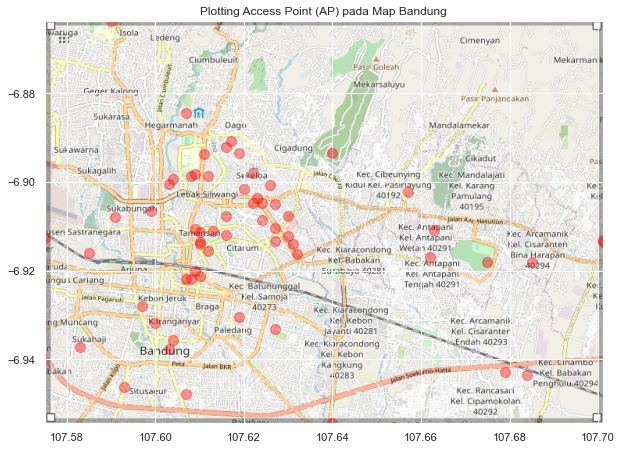

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(data_wifi.longitude, data_wifi.latitude, zorder=1, alpha=0.4,
           color='red', s=100)
plt.title('Plotting Access Point (AP) pada Map Bandung')
plt.xlim(long_min, long_max)
plt.ylim(lat_min, lat_max)
plt.imshow(bandung_map, zorder=0, extent=[long_min, long_max, lat_min, lat_max],
                                         aspect='equal')
plt.show()
plt.savefig('Plotting Access Point pada Map Bandung.png', bbox_inches='tight')
plt.savefig('Plotting Access Point pada Map Bandung.pdf', bbox_inches='tight')

In [17]:
img=cv2.imread('bandung_map.png')
cv2.imwrite('Plotting Access Point pada Map Bandung.png',img)

True

## 3.1 Transpose Data

In [18]:
data_wifitranspose=data_wifi 

In [19]:
data_wifitranspose.head()

nama_lokasi  longitude  latitude  January  February  March  \
0  Alun alun Ujungberung    107.701   -6.9131     1037       953    974   
1                  Andir    107.575   -6.9127        0         0      7   
2               Antapani    107.663   -6.9109        0         0     39   
3              Arcamanik    107.685   -6.9181        0         0      0   
4           Astana Anyar    107.600   -6.9319        0         0     27   

   April   May  June  July  August  September  October  November  December  \
0    819  1132   991   592     858        493      737       571       590   
1    116   205   206   329     387        526      424       365         3   
2    151   135    99   246     203        182      184       145       149   
3    217   376   412   422     423        336      333       147        92   
4    173   159    83   119      47          0        3        81       186   

   Grand Total  
0         9747  
1         2568  
2         1533  
3         2758  
4          878

In [20]:
data_wifitranspose=data_wifitranspose.drop(columns=['longitude','latitude'])

In [21]:
data_wifitranspose.head()

nama_lokasi  January  February  March  April   May  June  July  \
0  Alun alun Ujungberung     1037       953    974    819  1132   991   592   
1                  Andir        0         0      7    116   205   206   329   
2               Antapani        0         0     39    151   135    99   246   
3              Arcamanik        0         0      0    217   376   412   422   
4           Astana Anyar        0         0     27    173   159    83   119   

   August  September  October  November  December  Grand Total  
0     858        493      737       571       590         9747  
1     387        526      424       365         3         2568  
2     203        182      184       145       149         1533  
3     423        336      333       147        92         2758  
4      47          0        3        81       186          878

In [22]:
data_wifitranspose=data_wifitranspose.T #mentranspose baris menjadi kolom dan kolom menjadi baris

In [23]:
data_wifitranspose.head()

0      1         2          3             4   \
nama_lokasi  Alun alun Ujungberung  Andir  Antapani  Arcamanik  Astana Anyar   
January                       1037      0         0          0             0   
February                       953      0         0          0             0   
March                          974      7        39          0            27   
April                          819    116       151        217           173   

                          5            6                   7   \
nama_lokasi  Babakan Ciparay  Badung Cafe  Balai Ridwan Kamil   
January                    0          631                 712   
February                   0          632                 651   
March                      4          560                 566   
April                     80          582                 573   

                            8                        13  ...             79  \
nama_lokasi  Balaikota Bandung  Beer Point Traffic Cafe  ...  Taman Pramuka   
January                    891                      508  ...           1369   
February                    69                      549  ...           1503   
March                      981                      537  ...           1351   
April                     1018                      448  ...           1286   

                              80                                 81  \
nama_lokasi  Taman Pustaka Bunga  Taman Restorasi Sungai Cikapayang   
January                      636                                580   
February                     593                                 46   
March                        707                                563   
April                        518                                500   

                           82              83                84           85  \
nama_lokasi  Taman Super Hero  Taman Tegalega  Taman Tri G (3G)  Taman Vanda   
January                  2266             338              1723          138   
February                 1980             486              1868            8   
March                    1917             595              2405          101   
April                    1763             628              1560          202   

                            86                 87                     88  
nama_lokasi  Teras Cikapundung  Terminal Cicaheum  Terminal Leuwipanjang  
January                    884                740                   1379  
February                  1046                737                   1064  
March                     1022                713                   1457  
April                     1100                850                   1235  

[5 rows x 61 columns]

In [24]:
data_wifitranspose.columns=data_wifitranspose.iloc[0] #mengubah nama kolom dg baris pertama pada DataFrame

In [25]:
data_wifitranspose.head()

nama_lokasi  Alun alun Ujungberung  Andir  Antapani  Arcamanik  Astana Anyar  \
nama_lokasi  Alun alun Ujungberung  Andir  Antapani  Arcamanik  Astana Anyar   
January                       1037      0         0          0             0   
February                       953      0         0          0             0   
March                          974      7        39          0            27   
April                          819    116       151        217           173   

nama_lokasi  Babakan Ciparay  Badung Cafe  Balai Ridwan Kamil  \
nama_lokasi  Babakan Ciparay  Badung Cafe  Balai Ridwan Kamil   
January                    0          631                 712   
February                   0          632                 651   
March                      4          560                 566   
April                     80          582                 573   

nama_lokasi  Balaikota Bandung  Beer Point Traffic Cafe  ...  Taman Pramuka  \
nama_lokasi  Balaikota Bandung  Beer Point Traffic Cafe  ...  Taman Pramuka   
January                    891                      508  ...           1369   
February                    69                      549  ...           1503   
March                      981                      537  ...           1351   
April                     1018                      448  ...           1286   

nama_lokasi  Taman Pustaka Bunga  Taman Restorasi Sungai Cikapayang  \
nama_lokasi  Taman Pustaka Bunga  Taman Restorasi Sungai Cikapayang   
January                      636                                580   
February                     593                                 46   
March                        707                                563   
April                        518                                500   

nama_lokasi  Taman Super Hero  Taman Tegalega  Taman Tri G (3G)  Taman Vanda  \
nama_lokasi  Taman Super Hero  Taman Tegalega  Taman Tri G (3G)  Taman Vanda   
January                  2266             338              1723          138   
February                 1980             486              1868            8   
March                    1917             595              2405          101   
April                    1763             628              1560          202   

nama_lokasi  Teras Cikapundung  Terminal Cicaheum  Terminal Leuwipanjang  
nama_lokasi  Teras Cikapundung  Terminal Cicaheum  Terminal Leuwipanjang  
January                    884                740                   1379  
February                  1046                737                   1064  
March                     1022                713                   1457  
April                     1100                850                   1235  

[5 rows x 61 columns]

In [26]:
data_wifitranspose=data_wifitranspose.drop(['nama_lokasi'])

In [27]:
data_wifitranspose.head()

nama_lokasi Alun alun Ujungberung Andir Antapani Arcamanik Astana Anyar  \
January                      1037     0        0         0            0   
February                      953     0        0         0            0   
March                         974     7       39         0           27   
April                         819   116      151       217          173   
May                          1132   205      135       376          159   

nama_lokasi Babakan Ciparay Badung Cafe Balai Ridwan Kamil Balaikota Bandung  \
January                   0         631                712               891   
February                  0         632                651                69   
March                     4         560                566               981   
April                    80         582                573              1018   
May                      99         563                620              1086   

nama_lokasi Beer Point Traffic Cafe  ... Taman Pramuka Taman Pustaka Bunga  \
January                         508  ...          1369                 636   
February                        549  ...          1503                 593   
March                           537  ...          1351                 707   
April                           448  ...          1286                 518   
May                             909  ...          1252                 543   

nama_lokasi Taman Restorasi Sungai Cikapayang Taman Super Hero Taman Tegalega  \
January                                   580             2266            338   
February                                   46             1980            486   
March                                     563             1917            595   
April                                     500             1763            628   
May                                       693             1847            564   

nama_lokasi Taman Tri G (3G) Taman Vanda Teras Cikapundung Terminal Cicaheum  \
January                 1723         138               884               740   
February                1868           8              1046               737   
March                   2405         101              1022               713   
April                   1560         202              1100               850   
May                     2153         184              1214               963   

nama_lokasi Terminal Leuwipanjang  
January                      1379  
February                     1064  
March                        1457  
April                        1235  
May                          1410  

[5 rows x 61 columns]

In [28]:
data_wifi_T=data_wifitranspose

In [29]:
data_wifi_T.head()

nama_lokasi Alun alun Ujungberung Andir Antapani Arcamanik Astana Anyar  \
January                      1037     0        0         0            0   
February                      953     0        0         0            0   
March                         974     7       39         0           27   
April                         819   116      151       217          173   
May                          1132   205      135       376          159   

nama_lokasi Babakan Ciparay Badung Cafe Balai Ridwan Kamil Balaikota Bandung  \
January                   0         631                712               891   
February                  0         632                651                69   
March                     4         560                566               981   
April                    80         582                573              1018   
May                      99         563                620              1086   

nama_lokasi Beer Point Traffic Cafe  ... Taman Pramuka Taman Pustaka Bunga  \
January                         508  ...          1369                 636   
February                        549  ...          1503                 593   
March                           537  ...          1351                 707   
April                           448  ...          1286                 518   
May                             909  ...          1252                 543   

nama_lokasi Taman Restorasi Sungai Cikapayang Taman Super Hero Taman Tegalega  \
January                                   580             2266            338   
February                                   46             1980            486   
March                                     563             1917            595   
April                                     500             1763            628   
May                                       693             1847            564   

nama_lokasi Taman Tri G (3G) Taman Vanda Teras Cikapundung Terminal Cicaheum  \
January                 1723         138               884               740   
February                1868           8              1046               737   
March                   2405         101              1022               713   
April                   1560         202              1100               850   
May                     2153         184              1214               963   

nama_lokasi Terminal Leuwipanjang  
January                      1379  
February                     1064  
March                        1457  
April                        1235  
May                          1410  

[5 rows x 61 columns]

In [30]:
data_wifi_T.shape

(13, 61)

## 3.2 Grand Total

#### Jumlah titik Access Point (AP) = 61
#### 61 titik AP sangatlah banyak, sehingga dapat melakukan EDA lebih rinci, dengan data terbanyak atau data tersedikit melalui pemfilteran data.

In [31]:
category=data_wifi_T.columns.to_numpy(str) #nama lokasi
grand_total=data_wifi_T.iloc[-1].values #grand total

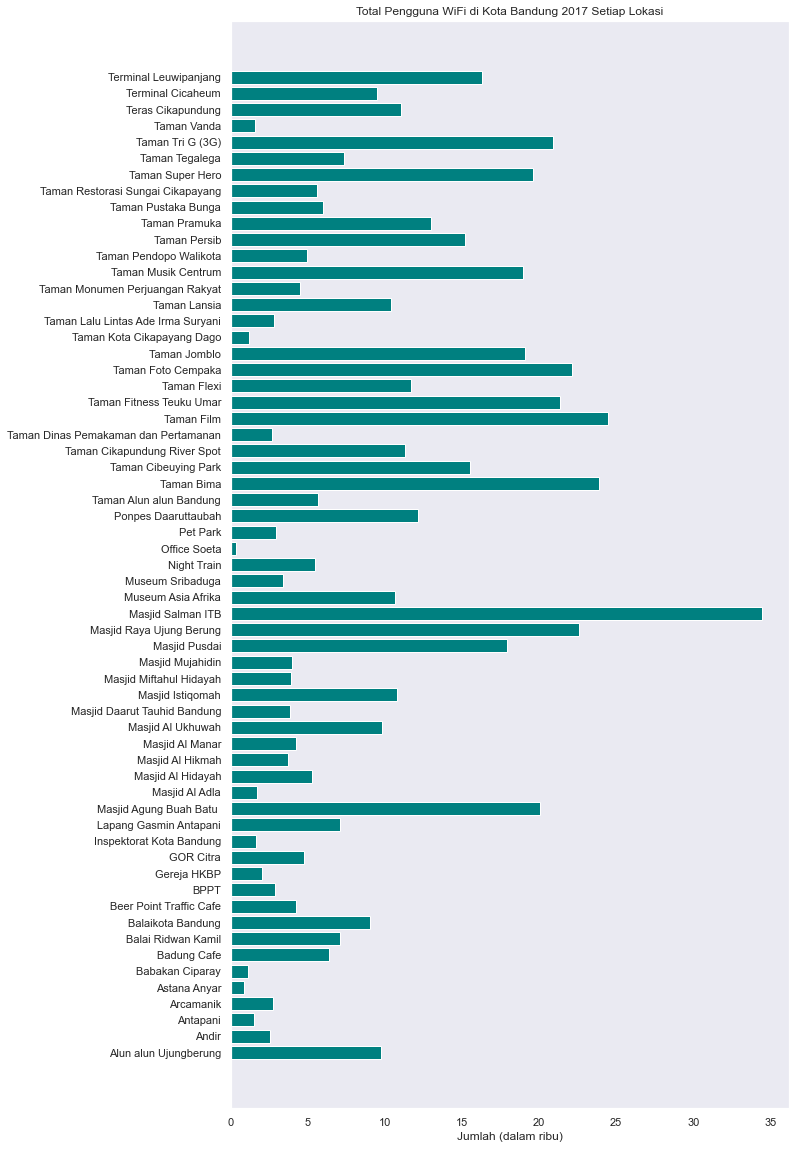

<Figure size 432x288 with 0 Axes>

In [32]:
x=np.arange(len(category))
y=grand_total/1000
plt.figure(figsize=(10,20))
plt.title('Total Pengguna WiFi di Kota Bandung 2017 Setiap Lokasi')
plt.barh(x,y,align='center',color='teal',zorder=2)
plt.yticks(x,category)
plt.xlabel('Jumlah (dalam ribu)')
plt.grid()
plt.show()
plt.savefig('Grafik Pengguna WiFi Sebelum Diurutkan.pdf')
plt.savefig('Grafik Pengguna WiFi Sebelum Diurutkan.png', bbox_inches='tight')

In [33]:
data={'Lokasi':category,
     'Total':grand_total}
data_grand_total=pd.DataFrame(data)
data_grand_total=data_grand_total.sort_values(by=['Total'])
data_grand_total.head()

Lokasi Total
31                Office Soeta   346
4                 Astana Anyar   878
5              Babakan Ciparay  1120
44  Taman Kota Cikapayang Dago  1203
2                     Antapani  1533

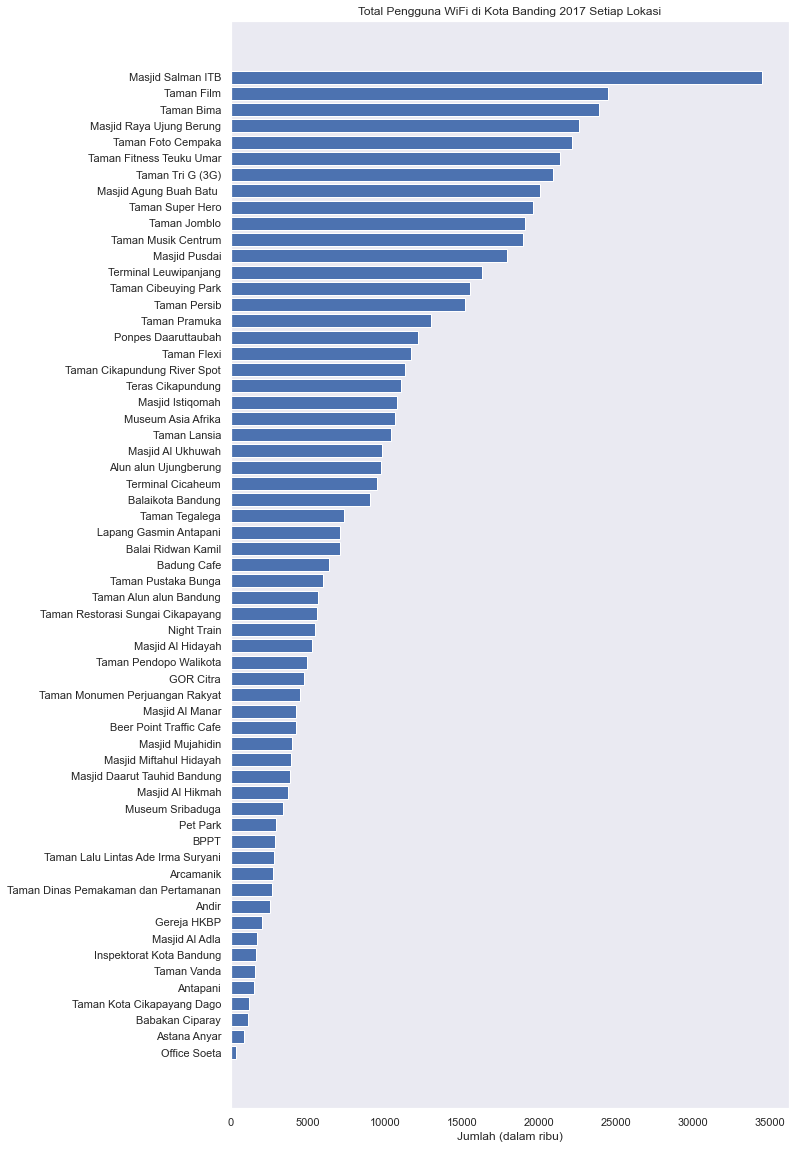

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(10,20))
plt.title('Total Pengguna WiFi di Kota Banding 2017 Setiap Lokasi')
plt.barh(x, data_grand_total['Total'])
plt.yticks(x, data_grand_total['Lokasi'])
plt.xlabel('Jumlah (dalam ribu)')
plt.grid()
plt.show()
plt.savefig('Grafik Pengguna WiFi Setelah Diurutkan.pdf')
plt.savefig('Grafik Pengguna WiFi Setelah Diurutkan.png')

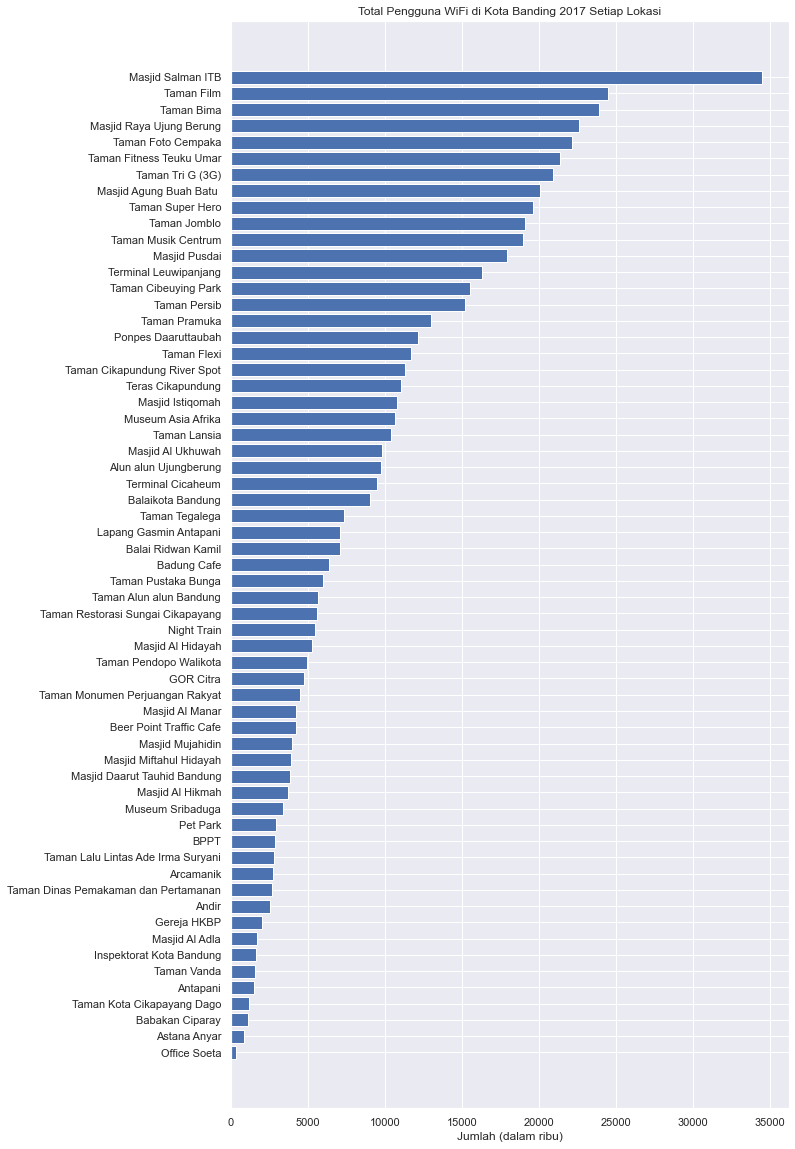

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(10,20))
plt.title('Total Pengguna WiFi di Kota Banding 2017 Setiap Lokasi')
plt.barh(x, data_grand_total['Total'])
plt.yticks(x, data_grand_total['Lokasi'])
plt.xlabel('Jumlah (dalam ribu)')

plt.show()
plt.savefig('Grafik Pengguna WiFi Setelah Diurutkan.pdf')
plt.savefig('Grafik Pengguna WiFi Setelah Diurutkan.png')

In [36]:
max_10=data_grand_total['Lokasi'].tail(10).to_numpy(str)
min_10=data_grand_total['Lokasi'].head(10).to_numpy(str)
data_new=np.concatenate((max_10,min_10))

In [37]:
print('10 titik pengguna WiFi terbanyak:',max_10)
print('10 titik pengguna WiFi terendah:',min_10)
print('Lokasi untuk dianalisis:',data_new)

10 titik pengguna WiFi terbanyak: ['Taman Jomblo' 'Taman Super Hero' 'Masjid Agung Buah Batu '
 'Taman Tri G (3G)' 'Taman Fitness Teuku Umar' 'Taman Foto Cempaka'
 'Masjid Raya Ujung Berung' 'Taman Bima' 'Taman Film' 'Masjid Salman ITB']
10 titik pengguna WiFi terendah: ['Office Soeta' 'Astana Anyar' 'Babakan Ciparay'
 'Taman Kota Cikapayang Dago' 'Antapani' 'Taman Vanda'
 'Inspektorat Kota Bandung' 'Masjid Al Adla' 'Gereja HKBP' 'Andir']
Lokasi untuk dianalisis: ['Taman Jomblo' 'Taman Super Hero' 'Masjid Agung Buah Batu '
 'Taman Tri G (3G)' 'Taman Fitness Teuku Umar' 'Taman Foto Cempaka'
 'Masjid Raya Ujung Berung' 'Taman Bima' 'Taman Film' 'Masjid Salman ITB'
 'Office Soeta' 'Astana Anyar' 'Babakan Ciparay'
 'Taman Kota Cikapayang Dago' 'Antapani' 'Taman Vanda'
 'Inspektorat Kota Bandung' 'Masjid Al Adla' 'Gereja HKBP' 'Andir']


In [38]:
data_wifi_T=data_wifi_T[data_new]

In [39]:
data_wifi_T=data_wifi_T.drop(['Grand Total'])

In [40]:
data_wifi_T.tail()

nama_lokasi Taman Jomblo Taman Super Hero Masjid Agung Buah Batu   \
August              1673             1945                    2062   
September           1640             1697                    2102   
October             1563             1326                    1210   
November            1358             1014                     151   
December            1498                0                     422   

nama_lokasi Taman Tri G (3G) Taman Fitness Teuku Umar Taman Foto Cempaka  \
August                  1857                     1093               2018   
September               1655                     1910               1681   
October                 1643                     1679               1817   
November                1274                     1083               1262   
December                1533                     1554               1643   

nama_lokasi Masjid Raya Ujung Berung Taman Bima Taman Film Masjid Salman ITB  \
August                          1821       2106       2060              2698   
September                       1451       1926       2028              2814   
October                         1797       1832       1869              3851   
November                        1784       1611       1346              3143   
December                        1855       1795       1576              2449   

nama_lokasi Office Soeta Astana Anyar Babakan Ciparay  \
August                 0           47             114   
September              6            0             145   
October                0            3             150   
November               0           81             166   
December               0          186             154   

nama_lokasi Taman Kota Cikapayang Dago Antapani Taman Vanda  \
August                               0      203         135   
September                          258      182         114   
October                            250      184         114   
November                           263      145          89   
December                           325      149         139   

nama_lokasi Inspektorat Kota Bandung Masjid Al Adla Gereja HKBP Andir  
August                           172            184         150   387  
September                        179            165         264   526  
October                          133            147         324   424  
November                         153            125         266   365  
December                         212            156         291     3

## 3.3 Exploration Data Analyst (EDA)

#### Plotting 20 lokasi dari pengguna WiFi terbanyak dan terendah

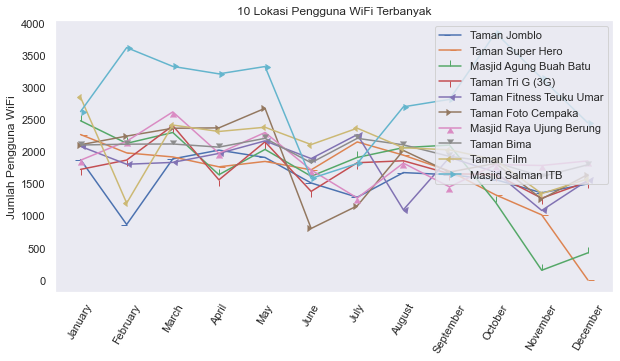

<Figure size 432x288 with 0 Axes>

In [41]:
category=data_wifi_T.columns.astype(str)
plt.figure(figsize=(10,5))
plt.title('10 Lokasi Pengguna WiFi Terbanyak')
for i in range(10):
    plt.plot(data_wifi_T.index, data_wifi_T[category[i]], label=category[i],
            marker=i)
plt.ylabel('Jumlah Pengguna WiFi')
plt.legend(loc='best')
plt.grid()
plt.xticks(data_wifi_T.index, rotation=60)
plt.show()
plt.savefig('Grafik 10 Lokasi Pengguna Wifi Terbanyak.pdf')
plt.savefig('Grafik 10 Lokasi Pengguna WiFi Terbanyak.png')

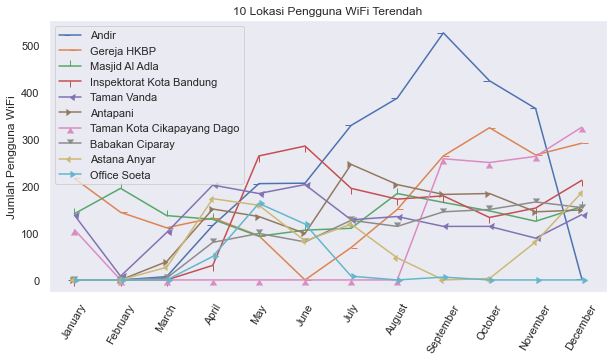

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=(10,5))
plt.title('10 Lokasi Pengguna WiFi Terendah')
for i in range(10):
    plt.plot(data_wifi_T.index, data_wifi_T[category[-i-1]], label=category[-i-1],
            marker=i)
plt.ylabel('Jumlah Pengguna WiFi')
plt.legend(loc='best')
plt.grid()
plt.xticks(data_wifi_T.index, rotation=60)
plt.show()
plt.savefig('Grafik 10 Lokasi Pengguna WiFi Terendah.png')
plt.savefig('Grafik 10 Lokasi Pengguna WiFi Terendah.pdf')

#### Pembuatan Pie Chart 

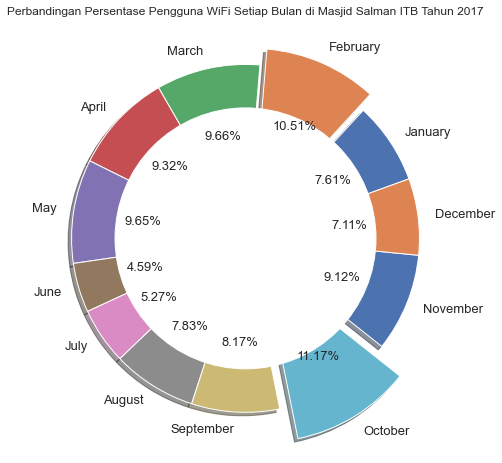

In [43]:
explode=(0,0.1,0,0,0,0,0,0,0,0.2,0,0)
plt.figure(figsize=(8,8))
plt.title('Perbandingan Persentase Pengguna WiFi Setiap Bulan di Masjid Salman ITB Tahun 2017')
plt.pie(data_wifi_T['Masjid Salman ITB'], autopct='%.2f%%', shadow=True, startangle=20,
       explode=explode, labels=data_wifi_T.index, textprops={'fontsize':13})
lingkar_tengah=plt.Circle((0,0), 0.75, fc='white')
fig=plt.gcf()
fig.gca().add_artist(lingkar_tengah)
plt.savefig('Perbandingan Persentase Pengguna WiFi Setiap Bulan di Masjid Salman ITB Tahun 2017.pdf')
plt.savefig('Perbandingan Persentase Pengguna WiFi Setiap Bulan di Masjid Salman ITB Tahun 2017.png')

#### Jumlah Pengguna WiFi tiap bulan lebih dari 10% diberikan explode.

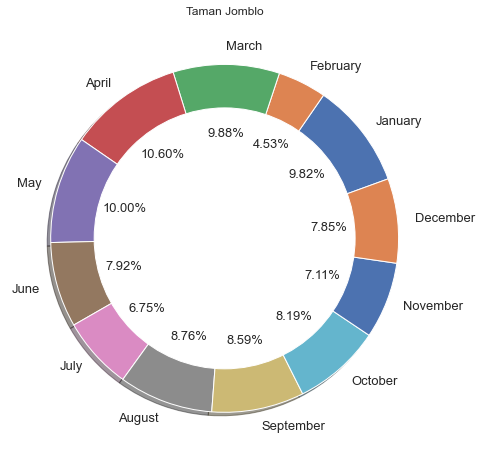

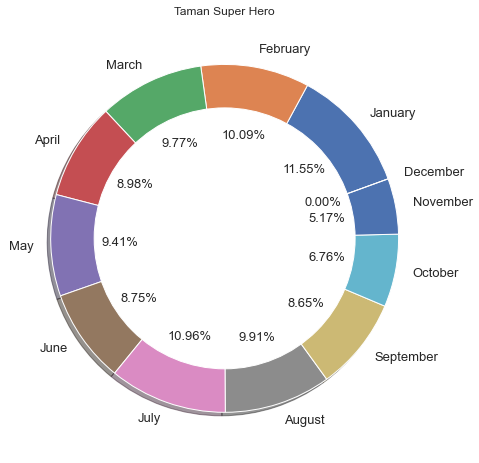

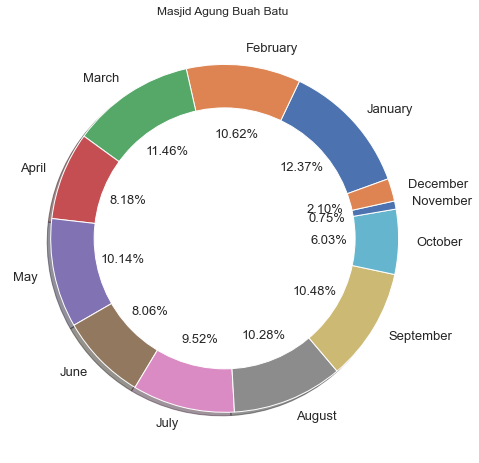

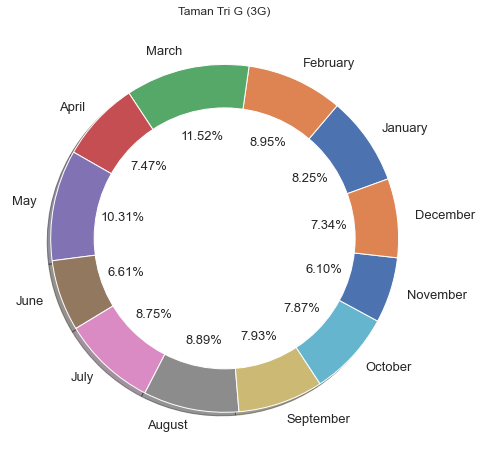

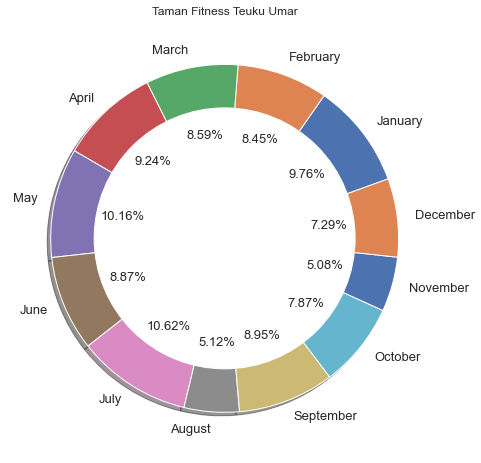

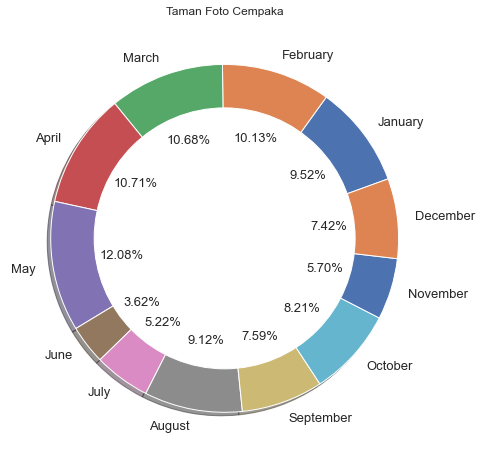

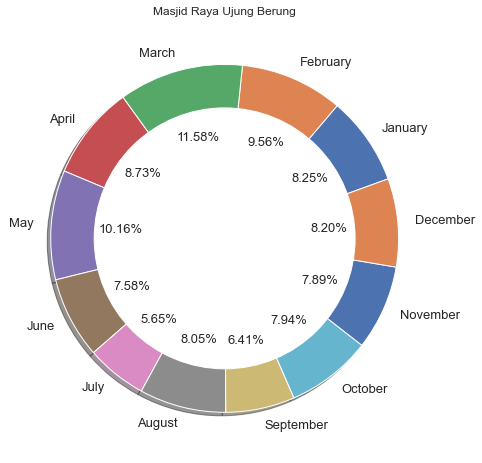

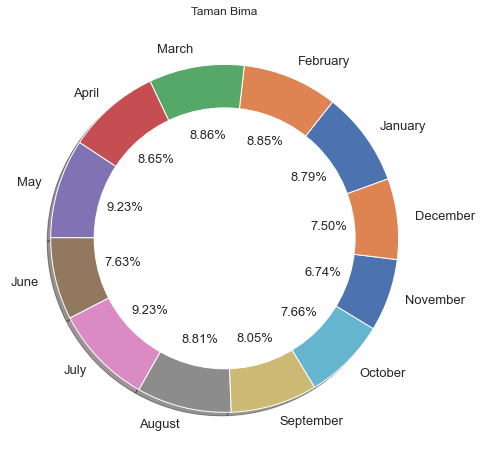

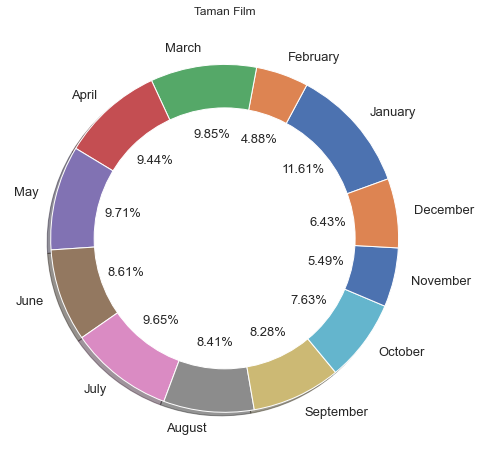

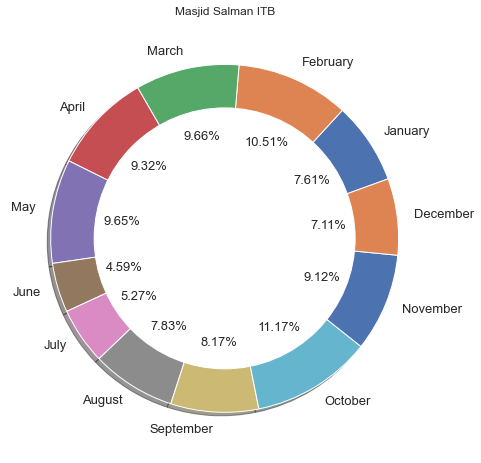

In [44]:
for w in max_10: #w adalah variabel dari 10 lokasi pengguna WiFi terbanyak
    plt.figure(figsize=(8,8))
    plt.title(w)
    plt.pie(data_wifi_T[w], autopct='%.2f%%', shadow=True, startangle=20, 
           labels=data_wifi_T.index, textprops={'fontsize':13})
    lingkar_tengah=plt.Circle((0,0), 0.75, fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(lingkar_tengah)
    plt.show()

#### Pie Chart diatas merupakan penggambaran dari 10 lokasi pengguna WiFi terbanyak.

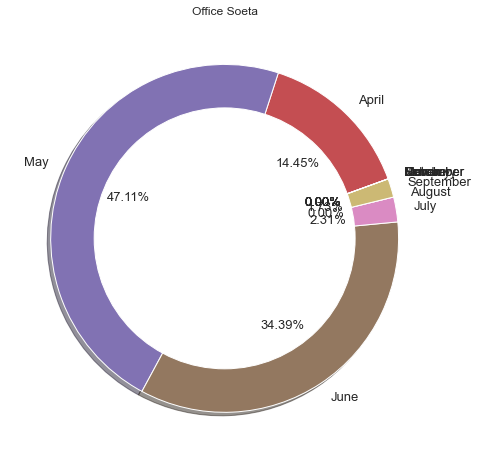

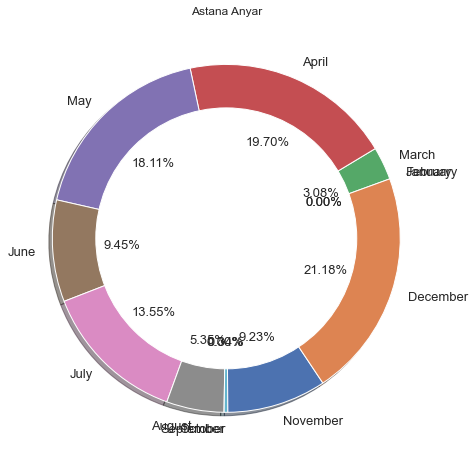

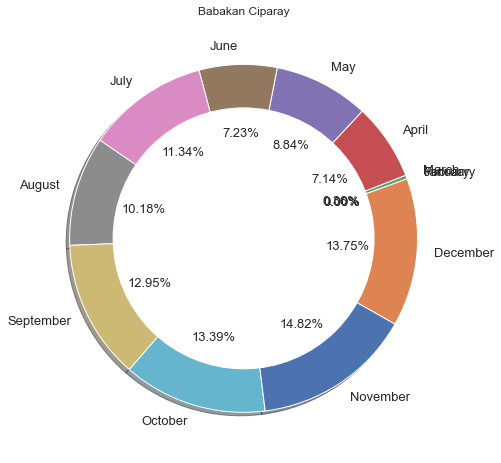

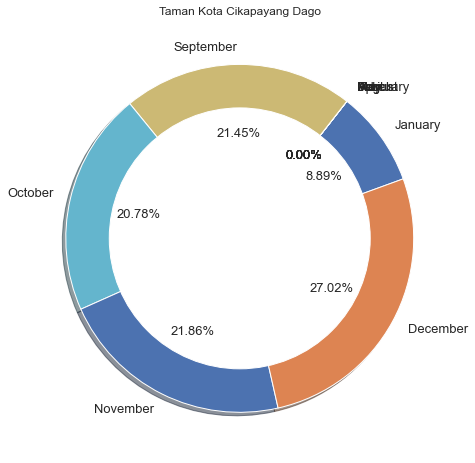

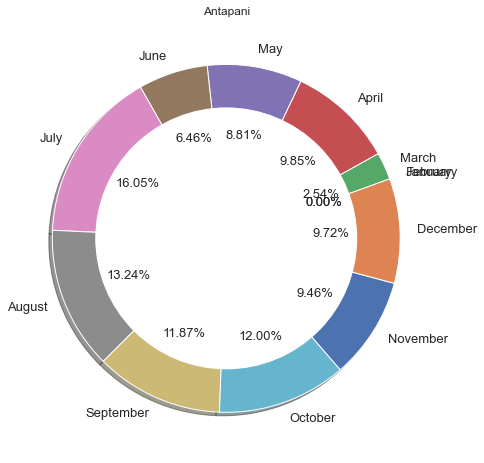

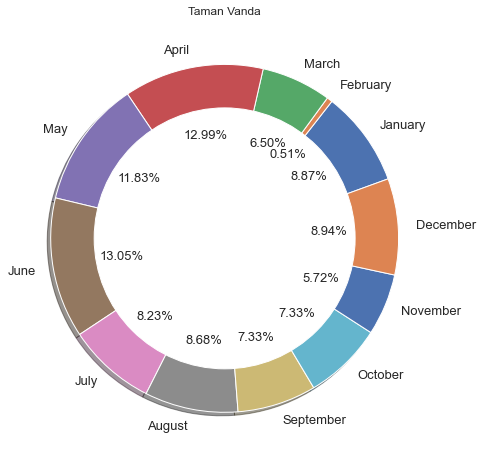

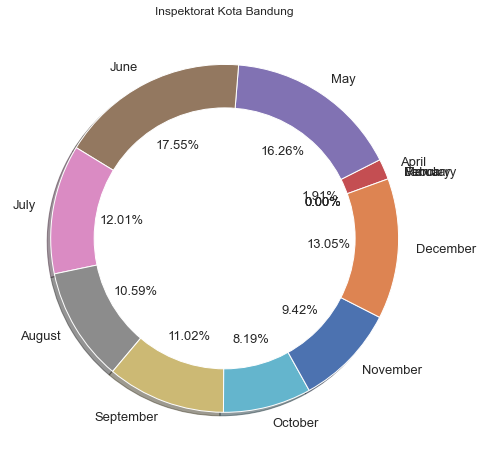

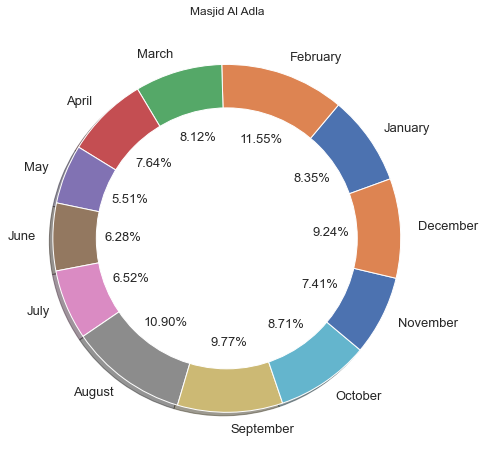

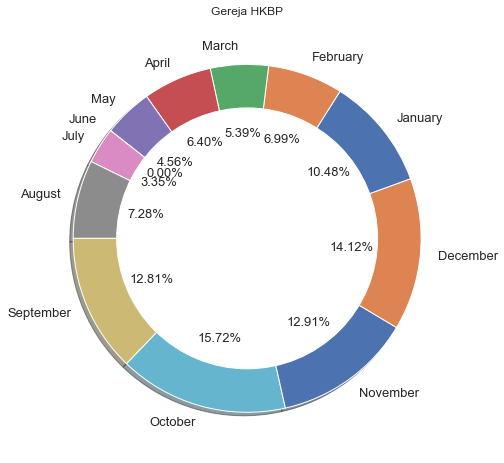

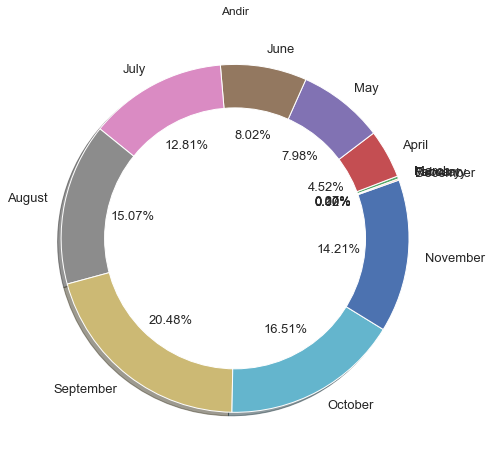

In [45]:
for w in min_10: #w adalah variabel dari 10 lokasi pengguna WiFi terbanyak
    plt.figure(figsize=(8,8))
    plt.title(w)
    plt.pie(data_wifi_T[w], autopct='%.2f%%', shadow=True, startangle=20, 
           labels=data_wifi_T.index, textprops={'fontsize':13})
    lingkar_tengah=plt.Circle((0,0), 0.75, fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(lingkar_tengah)
    plt.show()

#### Pie Chart untuk 10 lokasi pengguna WiFi terendah menumpuk pada bulan yang sama-sama memiliki nol pengguna WiFi, sehingga digunakan Bar Chart untuk memvisualisasikan dari 10 lokasi pengguna WiFi terendah agar visualisasi terlihat jelas.

In [46]:
print(np.arange(len(data_wifi_T.index))) #index dimulai dari nol, terdapat 12 data=12 bulan

[ 0  1  2  3  4  5  6  7  8  9 10 11]


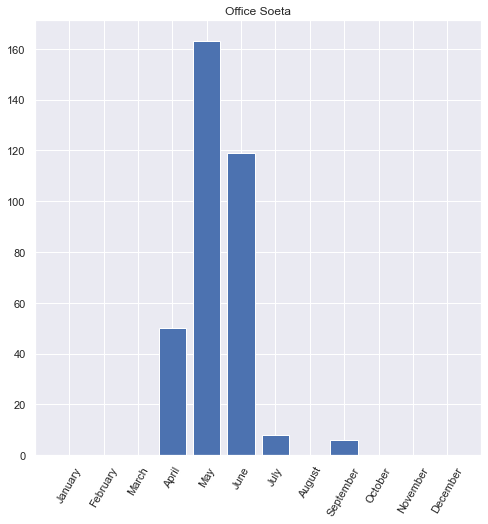

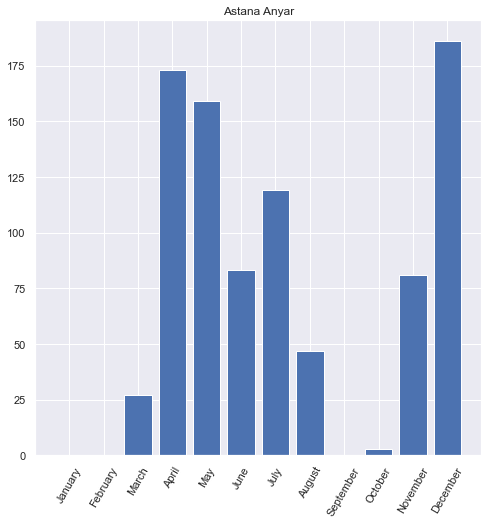

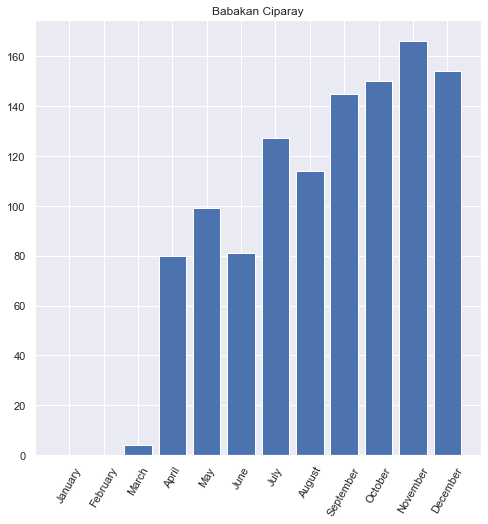

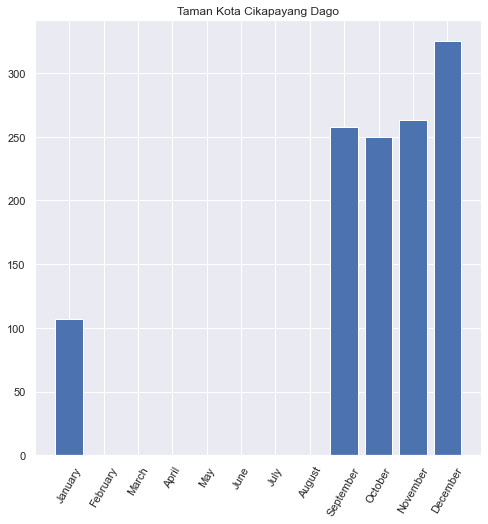

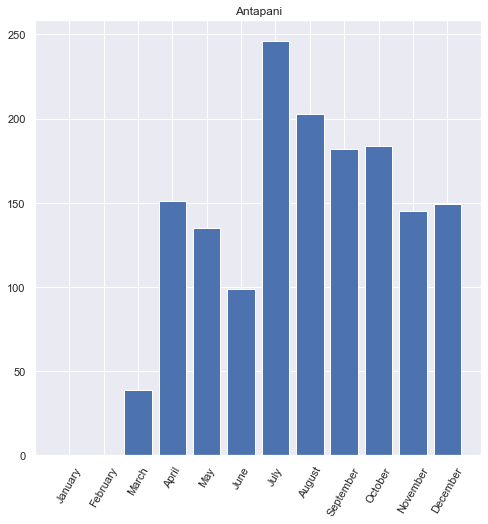

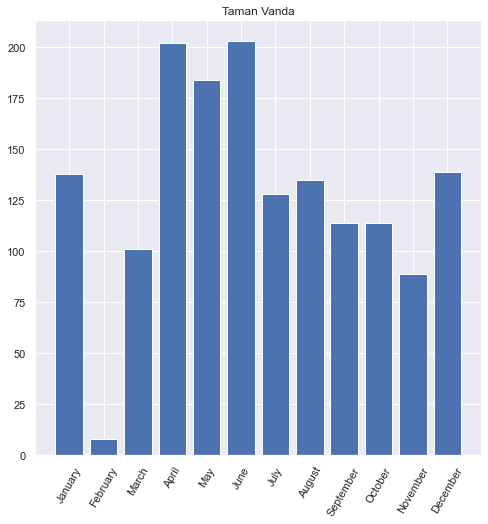

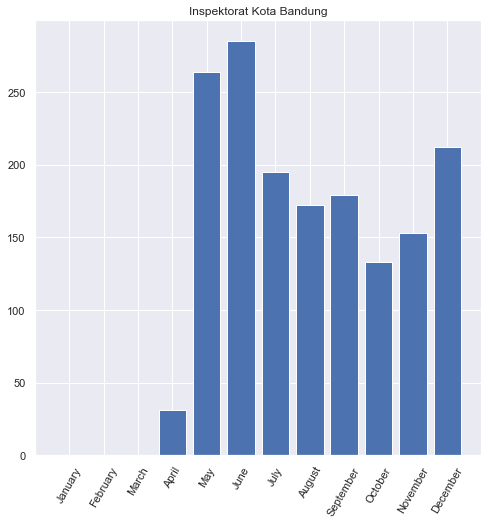

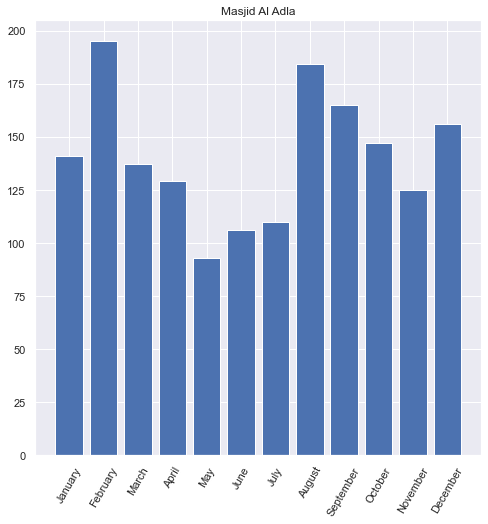

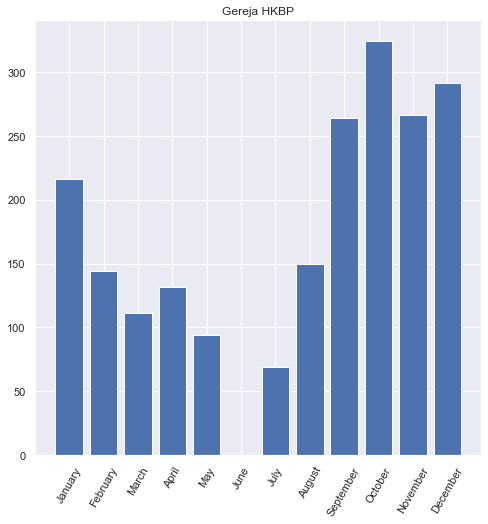

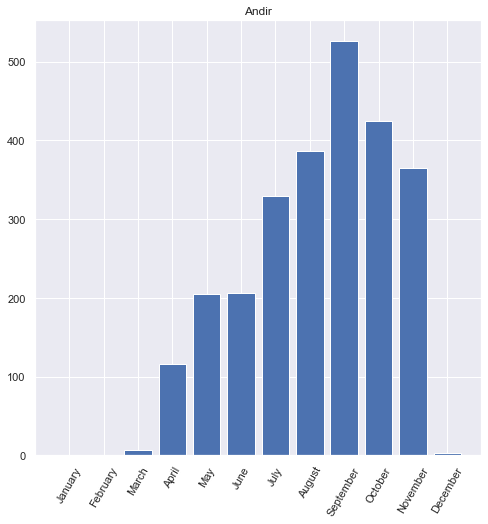

In [47]:
sumbu_x=range(len(data_wifi_T.index))
for w in min_10:
    plt.figure(figsize=(8,8))
    plt.title(w)
    plt.bar(sumbu_x, data_wifi_T[w])
    plt.xticks(sumbu_x, data_wifi_T.index, rotation=60)
    plt.show()

#### Pemfilteran bagian bulan yang bernilai nol, sehingga Pie Chart yang dibuat tidak bulan dimana tidak ada pengguna WiFi.

In [48]:
for w in min_10:
    for j in range(len(data_wifi_T.index)):
        if data_wifi_T[w][j]==0:
            print(w,j)
            data_wifi_T[w]=data_wifi_T[w].drop(index=data_wifi_T.index[j])

Office Soeta 0
Office Soeta 1
Office Soeta 2
Office Soeta 7
Office Soeta 9
Office Soeta 10
Office Soeta 11
Astana Anyar 0
Astana Anyar 1
Astana Anyar 8
Babakan Ciparay 0
Babakan Ciparay 1
Taman Kota Cikapayang Dago 1
Taman Kota Cikapayang Dago 2
Taman Kota Cikapayang Dago 3
Taman Kota Cikapayang Dago 4
Taman Kota Cikapayang Dago 5
Taman Kota Cikapayang Dago 6
Taman Kota Cikapayang Dago 7
Antapani 0
Antapani 1
Inspektorat Kota Bandung 0
Inspektorat Kota Bandung 1
Inspektorat Kota Bandung 2
Gereja HKBP 5
Andir 0
Andir 1


#### 0 = Januari, 1 = Februari, ..., 11= Desember
#### Setelah didapatkan nama lokasi serta bulan dimana tidak pengguna WiFi di lokasi tersebut, maka Pie Chart untuk 10 lokasi pengguna WiFi terendah dapat divisualisasikan.

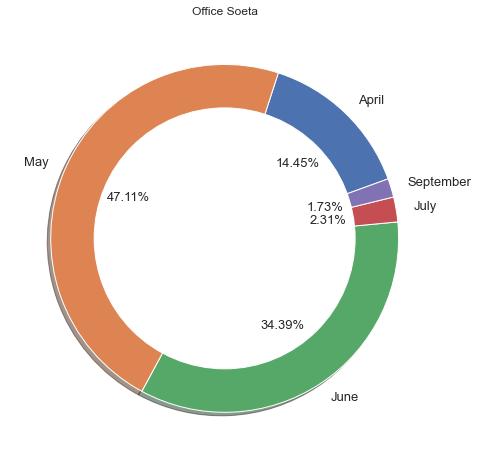

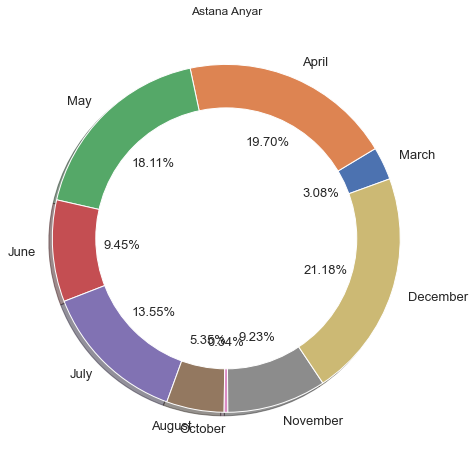

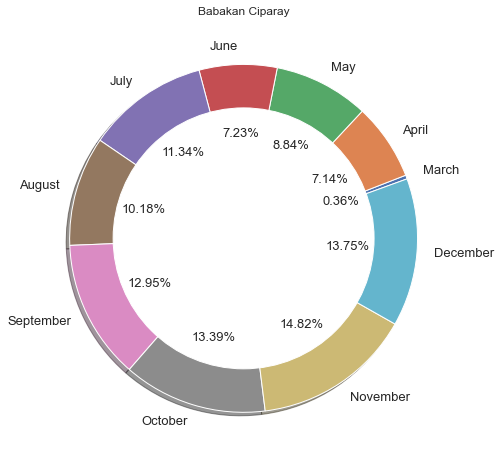

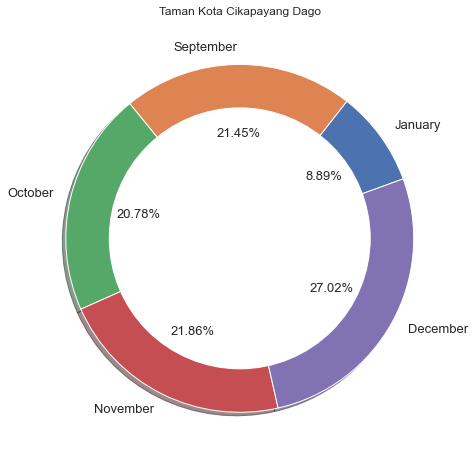

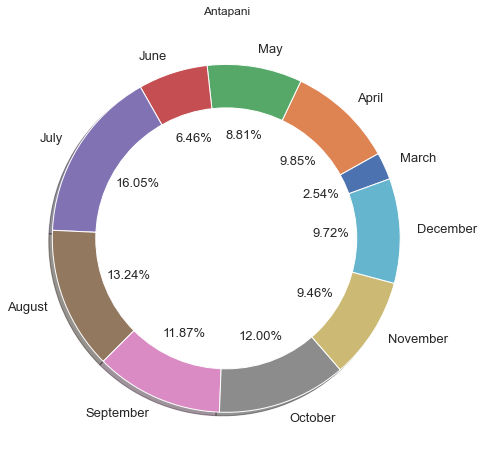

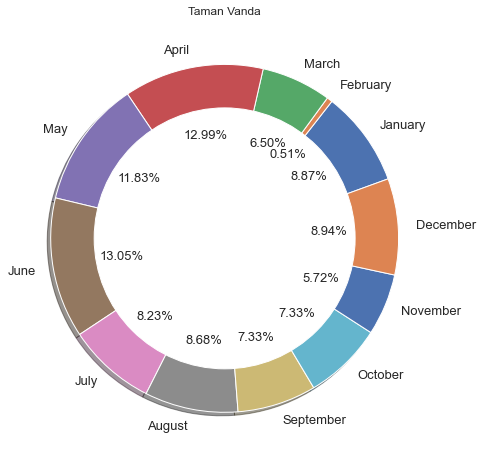

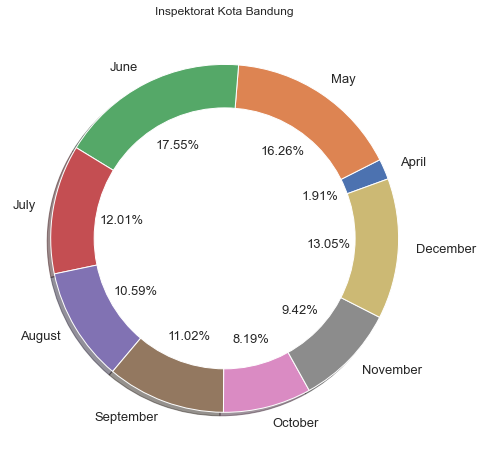

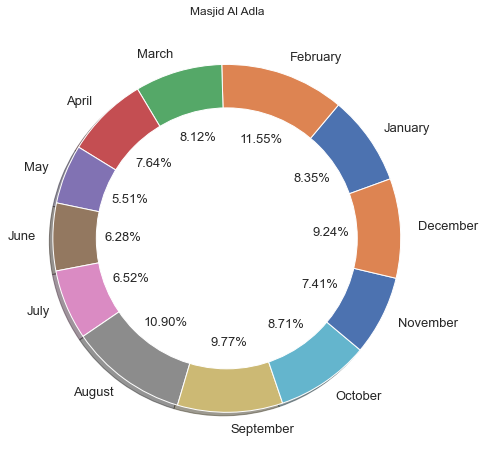

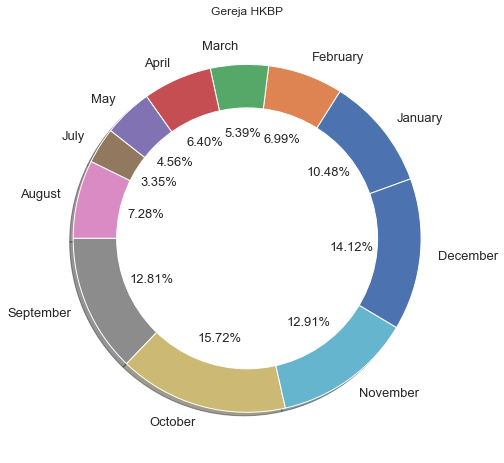

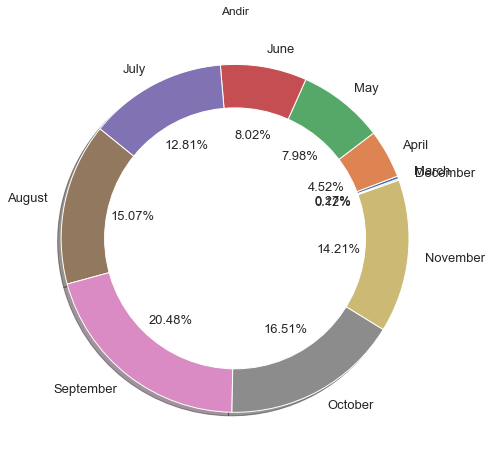

In [49]:
for w in min_10:
    plt.figure(figsize=(8,8))
    plt.title(w)
    plt.pie(data_wifi_T[w].dropna(), autopct='%.2f%%',
           shadow=True, startangle=20, labels=data_wifi_T[w].dropna().index,
           textprops={'fontsize':13})
    lingkar_tengah=plt.Circle((0,0),0.75,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(lingkar_tengah)
    plt.show()

#### Tujuan Pie Chart adalah melihat pembagian persentase, meskipun tidak menampilkan 12 bulan data di Pie Chart.

In [50]:
data_wifi_T.tail()

nama_lokasi Taman Jomblo Taman Super Hero Masjid Agung Buah Batu   \
August              1673             1945                    2062   
September           1640             1697                    2102   
October             1563             1326                    1210   
November            1358             1014                     151   
December            1498                0                     422   

nama_lokasi Taman Tri G (3G) Taman Fitness Teuku Umar Taman Foto Cempaka  \
August                  1857                     1093               2018   
September               1655                     1910               1681   
October                 1643                     1679               1817   
November                1274                     1083               1262   
December                1533                     1554               1643   

nama_lokasi Masjid Raya Ujung Berung Taman Bima Taman Film Masjid Salman ITB  \
August                          1821       2106       2060              2698   
September                       1451       1926       2028              2814   
October                         1797       1832       1869              3851   
November                        1784       1611       1346              3143   
December                        1855       1795       1576              2449   

nama_lokasi Office Soeta Astana Anyar Babakan Ciparay  \
August               NaN           47             114   
September              6          NaN             145   
October              NaN            3             150   
November             NaN           81             166   
December             NaN          186             154   

nama_lokasi Taman Kota Cikapayang Dago Antapani Taman Vanda  \
August                             NaN      203         135   
September                          258      182         114   
October                            250      184         114   
November                           263      145          89   
December                           325      149         139   

nama_lokasi Inspektorat Kota Bandung Masjid Al Adla Gereja HKBP Andir  
August                           172            184         150   387  
September                        179            165         264   526  
October                          133            147         324   424  
November                         153            125         266   365  
December                         212            156         291     3

## 4. Machine Learning: Prophet

#### Pemodelan data pada perkembangan pengguna WiFi di Kota Bandung dilakukan prediksi untuk satu tahun berikutnya (2018). Oleh karena itu, diperlukan jenis Time Series dan menggunakan pustaka datetime. 
#### Untuk memperbaiki index menggunakan TimeStamp. 
#### Diasumsikan: jumlah total pengguna WiFi disimpan di akhir bulan.

In [51]:
from datetime import datetime
datemin=datetime(2017, 1, 1)
datemax=datetime(2017, 12, 31)
data_wifi_T['Bulan']=pd.date_range(datemin, datemax, freq='M').to_pydatetime().tolist()
data_wifi_T.head()

nama_lokasi Taman Jomblo Taman Super Hero Masjid Agung Buah Batu   \
January             1875             2266                    2481   
February             864             1980                    2129   
March               1887             1917                    2298   
April               2023             1763                    1640   
May                 1909             1847                    2034   

nama_lokasi Taman Tri G (3G) Taman Fitness Teuku Umar Taman Foto Cempaka  \
January                 1723                     2082               2107   
February                1868                     1803               2242   
March                   2405                     1832               2364   
April                   1560                     1972               2370   
May                     2153                     2167               2675   

nama_lokasi Masjid Raya Ujung Berung Taman Bima Taman Film Masjid Salman ITB  \
January                         1866       2103       2846              2624   
February                        2162       2116       1197              3621   
March                           2619       2119       2414              3328   
April                           1975       2070       2314              3212   
May                             2298       2207       2380              3326   

nama_lokasi  ... Astana Anyar Babakan Ciparay Taman Kota Cikapayang Dago  \
January      ...          NaN             NaN                        107   
February     ...          NaN             NaN                        NaN   
March        ...           27               4                        NaN   
April        ...          173              80                        NaN   
May          ...          159              99                        NaN   

nama_lokasi Antapani Taman Vanda Inspektorat Kota Bandung Masjid Al Adla  \
January          NaN         138                      NaN            141   
February         NaN           8                      NaN            195   
March             39         101                      NaN            137   
April            151         202                       31            129   
May              135         184                      264             93   

nama_lokasi Gereja HKBP Andir      Bulan  
January             216   NaN 2017-01-31  
February            144   NaN 2017-02-28  
March               111     7 2017-03-31  
April               132   116 2017-04-30  
May                  94   205 2017-05-31  

[5 rows x 21 columns]

#### Mengubah waktu dari per-bulan menjadi per-hari dengan menggunakan distribusi random.
#### Dengan multinominal dari pustaka Numpy, data-data disimpan dalam DataFrame baru untuk setiap lokasi.

In [52]:
hari_365=pd.date_range(datemin, datemax, freq='D').to_pydatetime().tolist()

#### Di bawah ini adalah jumlah Pengguna WiFi setiap bulan untuk lokasi Masjid Salman ITB yang merupakan jumlah pengguna WiFi terbanyak.

In [53]:
data_wifi_T['Masjid Salman ITB'].head()

January     2624
February    3621
March       3328
April       3212
May         3326
Name: Masjid Salman ITB, dtype: object

In [54]:
y_hh=np.zeros(shape=(12,31))
y_salman=data_wifi_T['Masjid Salman ITB']
for i in range (len(data_wifi_T)):
    y_hh[i,0:data_wifi_T['Bulan'][i].day]=(np.random.multinomial(y_salman[i], 
                                                                 np.ones(data_wifi_T['Bulan'][i].day)/data_wifi_T['Bulan'][i].day,
                                                                 size=1)[0])

In [55]:
y_hh.shape

(12, 31)

#### Angka 12 diatas mewakili jumlah bulan, dan 31 mewakili jumlah hari paling banyak, sehingga memangkas nilai nol.

In [56]:
y_hh=y_hh[y_hh!=0].flatten()

## 4.1 Machine Learning dengan Metode Prophet untuk Time Series

In [57]:
from fbprophet import Prophet
data_salman={'ds':hari_365,
            'y':y_hh}

data_wifi_salman=pd.DataFrame.from_dict(data_salman, orient='index').T
data_wifi_salman=data_wifi_salman.reset_index(drop=True)
data_wifi_salman.tail()

ds   y
360 2017-12-27  74
361 2017-12-28  91
362 2017-12-29  78
363 2017-12-30  87
364 2017-12-31  87

#### Kelebihan dari metode Prophet adalah akurasi, dan kekuranggan adalah perlakuan untuk prediksi harus satu demi satu. DataFrame pada Prophet memiliki template khusus yaitu nama kolom ds dan y.

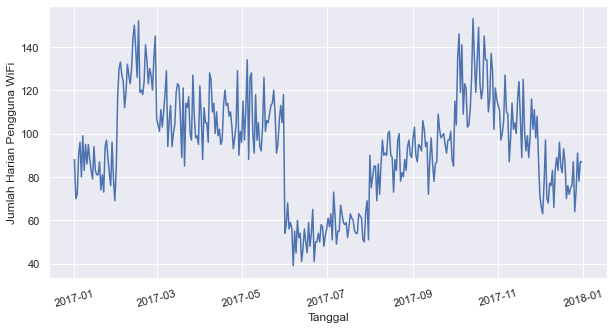

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(x="ds",y=data_wifi_salman['y'].astype(int),data=data_wifi_salman)
plt.xticks(rotation=15)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Harian Pengguna WiFi')
plt.show()

#### Semua baris dari data diambil sebagai data uji dan meprediksi untuk 100 hari ke depan.

In [59]:
pred_size=100 #hari
m=Prophet(yearly_seasonality=False, daily_seasonality=False,
         weekly_seasonality=True, changepoint_prior_scale=100,
         n_changepoints=100)
m.fit(data_wifi_salman)
future=m.make_future_dataframe(periods=pred_size, freq='D')
pred=m.predict(future)
pred.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2017-01-01  80.656802   68.038652   91.871125    80.656802    80.656802   
1 2017-01-02  81.355817   69.176861   93.523207    81.355817    81.355817   
2 2017-01-03  82.054831   71.053852   95.960425    82.054831    82.054831   
3 2017-01-04  82.753846   73.313918   95.860426    82.753846    82.753846   
4 2017-01-05  85.266495   72.625171   96.554267    85.266495    85.266495   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -0.945063             -0.945063             -0.945063 -0.945063   
1        0.273323              0.273323              0.273323  0.273323   
2        1.570536              1.570536              1.570536  1.570536   
3        1.628542              1.628542              1.628542  1.628542   
4       -0.363253             -0.363253             -0.363253 -0.363253   

   weekly_lower  weekly_upper  multiplicative_terms  \
0     -0.945063     -0.945063                   0.0   
1      0.273323      0.273323                   0.0   
2      1.570536      1.570536                   0.0   
3      1.628542      1.628542                   0.0   
4     -0.363253     -0.363253                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  79.711739  
1                         0.0                         0.0  81.629140  
2                         0.0                         0.0  83.625368  
3                         0.0                         0.0  84.382387  
4                         0.0                         0.0  84.903242

#### Pada tabel diaats, yhat merepresentasikan prediksi, sedangkan yhat_lower dan yhat_upper menggambarkan batas bawah dan batas atas.

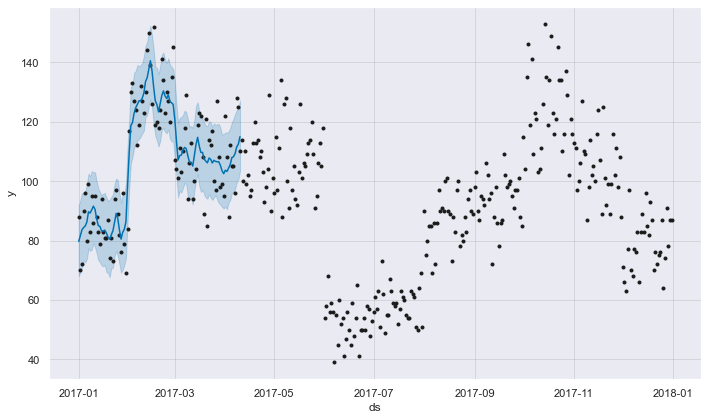

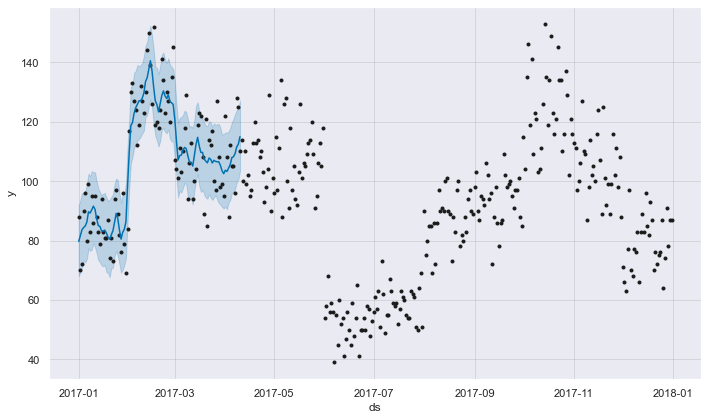

In [60]:
m.plot(pred[:pred_size])

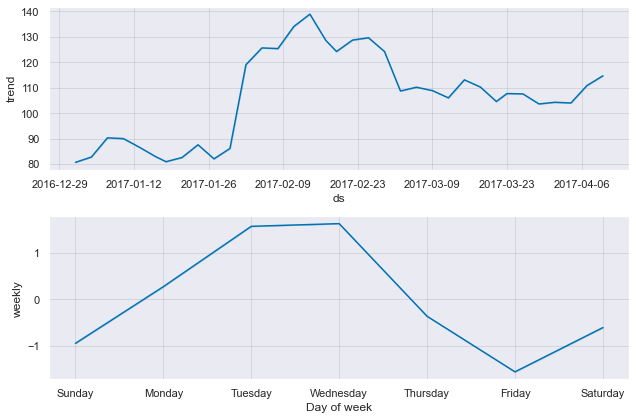

In [61]:
m.plot_components(pred[:pred_size]);

#### Grafik diatas menggambarkan plot yang lebih baik dengan menggunakan komponen yang berada pada DataFrame Prophet.

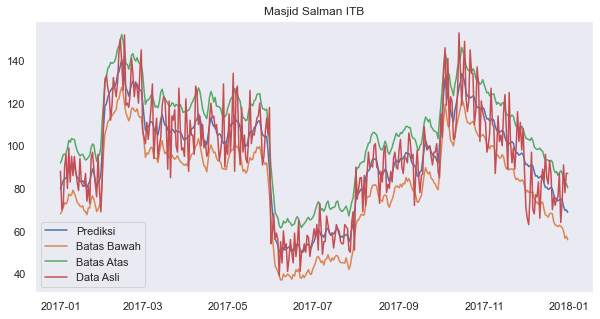

In [62]:
plt.figure(figsize=(10,5)) 
plt.title('Masjid Salman ITB') 
plt.plot(data_wifi_salman['ds'], pred['yhat'][:-pred_size], label='Prediksi') 
plt.plot(data_wifi_salman['ds'], pred['yhat_lower'][:-pred_size],label='Batas Bawah') 
plt.plot(data_wifi_salman['ds'], pred['yhat_upper'][:-pred_size],label='Batas Atas') 
plt.plot(data_wifi_salman['ds'], data_wifi_salman['y'], label='Data Asli') 
plt.grid() 
plt.legend(loc='best') 
plt.show()

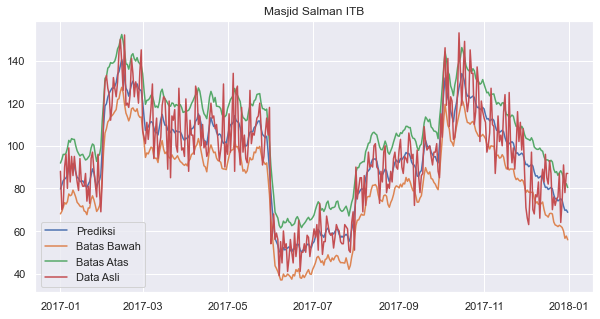

In [63]:
plt.figure(figsize=(10,5)) 
plt.title('Masjid Salman ITB') 
plt.plot(data_wifi_salman['ds'], pred['yhat'][:-pred_size], label='Prediksi') 
plt.plot(data_wifi_salman['ds'], pred['yhat_lower'][:-pred_size],label='Batas Bawah') 
plt.plot(data_wifi_salman['ds'], pred['yhat_upper'][:-pred_size],label='Batas Atas') 
plt.plot(data_wifi_salman['ds'], data_wifi_salman['y'], label='Data Asli') 

plt.legend(loc='best') 
plt.show()

In [64]:
data_wifi_salman['prophet']=pred['yhat'][:-pred_size] 
data_wifi_salman['delta']=abs(data_wifi_salman['y']-data_wifi_salman['prophet']) 
data_wifi_salman.head(10)

ds   y    prophet    delta
0 2017-01-01  88  79.711739  8.28826
1 2017-01-02  70  81.629140  11.6291
2 2017-01-03  72  83.625368  11.6254
3 2017-01-04  90  84.382387  5.61761
4 2017-01-05  96  84.903242  11.0968
5 2017-01-06  80  86.221364  6.22136
6 2017-01-07  99  89.685487  9.31451
7 2017-01-08  83  89.250335  6.25033
8 2017-01-09  95  90.372326  4.62767
9 2017-01-10  86  91.573145  5.57315

## 5. Skor dan Evaluasi

#### Evaluasi yang digunakan yaitu Mean Absolute Error (MEA) dan R2 Score, karena menggunakan data distribusi random dan sesungguhnya.

In [65]:
from sklearn.metrics import mean_absolute_error,r2_score 
print("Score MEA :",mean_absolute_error(data_wifi_salman['y'], pred['yhat'][:-pred_size])) 
print("Score R2 :",r2_score(data_wifi_salman['y'], pred['yhat'][:-pred_size]))

Score MEA : 7.49297629280173
Score R2 : 0.8447375937765528


In [66]:
data_wifi_T['Masjid Salman ITB'].head()

January     2624
February    3621
March       3328
April       3212
May         3326
Name: Masjid Salman ITB, dtype: object

#### Data diatas merupakan jumlah pengguna WiFi di lokasi Masjid Salman ITB.

## 5.1 Machine Learning dengan Metode Prophet untuk Time Series

In [67]:
from fbprophet import Prophet 
data_tf={'ds':data_wifi_T['Bulan'], 'y':data_wifi_T['Masjid Salman ITB']}
data_wifi_tf=pd.DataFrame.from_dict(data_tf, orient='index').T 
data_wifi_tf=data_wifi_tf.reset_index(drop=True) 
data_wifi_tf.tail()

ds     y
7  2017-08-31  2698
8  2017-09-30  2814
9  2017-10-31  3851
10 2017-11-30  3143
11 2017-12-31  2449

#### Kelebihan dari metode Prophet adalah akurasi, dan kekurangannya adalah perlakuan untuk membuat prediksi harus satu demi satu.
#### DataFrame pada Prophet memiliki template khusus yaitu nama kolom ds dan y.
#### Di bawah ini, semua baris dari data diambil sebagai data uji dan memprediksi untuk 3 bulan ke depan.

In [68]:
pred_size=3 #bulan 
m=Prophet(yearly_seasonality=False, daily_seasonality=False, 
          weekly_seasonality=False, n_changepoints=6, changepoint_prior_scale=100) 
m.fit(data_wifi_tf) 
future=m.make_future_dataframe(periods=pred_size, freq='M') 
pred=m.predict(future) 
pred.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2017-01-31  2654.485319  2310.113696  3028.682083  2654.485319  2654.485319   
1 2017-02-28  3563.929161  3200.323784  3932.434689  3563.929161  3563.929161   
2 2017-03-31  3376.146420  2998.907464  3732.111816  3376.146420  3376.146420   
3 2017-04-30  3194.421187  2767.069242  3552.163704  3194.421187  3194.421187   
4 2017-05-31  3316.707118  2925.102844  3682.129010  3316.707118  3316.707118   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0             0.0                   0.0                   0.0   
1             0.0                   0.0                   0.0   
2             0.0                   0.0                   0.0   
3             0.0                   0.0                   0.0   
4             0.0                   0.0                   0.0   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  2654.485319  
1                         0.0  3563.929161  
2                         0.0  3376.146420  
3                         0.0  3194.421187  
4                         0.0  3316.707118

#### Pada tabel diatas, yhat merepresentasikan prediksi, sedangkan yhat_lower dan yhat_upper menggambarkan batas bawah dan atas pada prediksi.

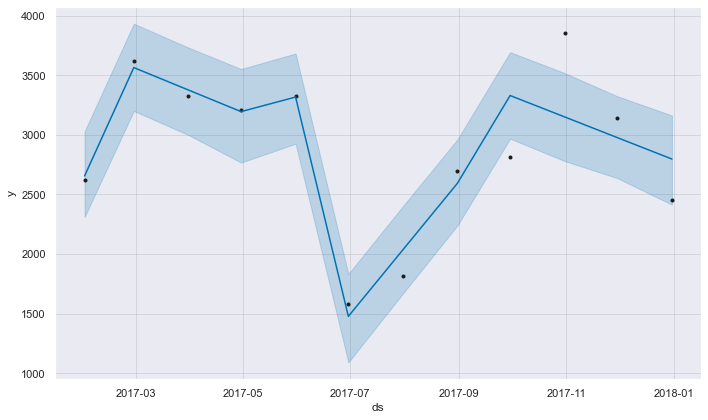

In [69]:
m.plot(pred[:-pred_size]);

#### Grafik diatas menunjukkan bahwa Prophet dapat menyediakan plot secara langsung hingga 3 bulan ke depan.

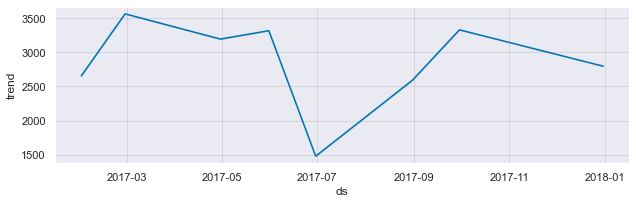

In [70]:
m.plot_components(pred[:-pred_size]);

#### Grafik diatas menunjukkan bahwa plot dapat divisualisasikan lebih baik dengan menggunakan komponen yang berada pada DataFrame Prophet.

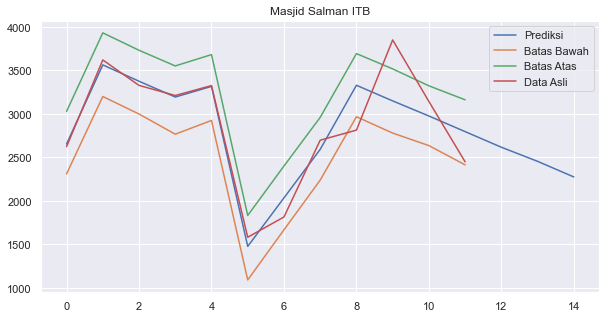

In [71]:
plt.figure(figsize=(10,5)) 
plt.title('Masjid Salman ITB')
pred['yhat'].plot(label='Prediksi') 
pred['yhat_lower'][:-pred_size].plot(label='Batas Bawah') 
pred['yhat_upper'][:-pred_size].plot(label='Batas Atas') 
data_wifi_tf['y'].plot(label='Data Asli') 
plt.grid('off') 
plt.legend(loc='best') 
plt.show()

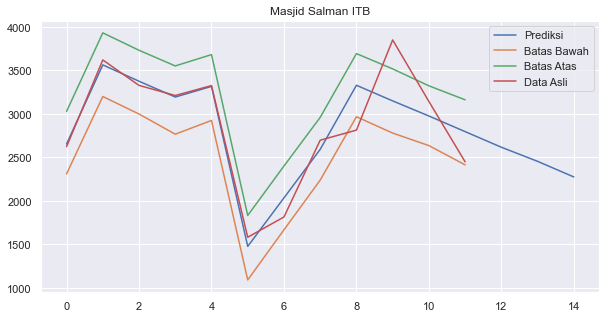

In [72]:
plt.figure(figsize=(10,5)) 
plt.title('Masjid Salman ITB')
pred['yhat'].plot(label='Prediksi') 
pred['yhat_lower'][:-pred_size].plot(label='Batas Bawah') 
pred['yhat_upper'][:-pred_size].plot(label='Batas Atas') 
data_wifi_tf['y'].plot(label='Data Asli') 

plt.legend(loc='best') 
plt.show()

In [73]:
data_wifi_tf['prophet']=pred['yhat'] 
data_wifi_tf['delta']=abs(data_wifi_tf['y']-data_wifi_tf['prophet']) 
data_wifi_tf.head(12)

ds     y      prophet    delta
0  2017-01-31  2624  2654.485319  30.4853
1  2017-02-28  3621  3563.929161  57.0708
2  2017-03-31  3328  3376.146420  48.1464
3  2017-04-30  3212  3194.421187  17.5788
4  2017-05-31  3326  3316.707118  9.29288
5  2017-06-30  1582  1476.813743  105.186
6  2017-07-31  1815  2034.816674  219.817
7  2017-08-31  2698  2592.819604   105.18
8  2017-09-30  2814  3329.532999  515.533
9  2017-10-31  3851  3149.958587  701.041
10 2017-11-30  3143  2976.176898  166.823
11 2017-12-31  2449  2796.602486  347.602

## 5.2 Skor dan Evaluasi Pada Data Per-Hari

In [74]:
from sklearn.metrics import mean_absolute_error,r2_score 
print("Score MEA :",mean_absolute_error(data_wifi_tf['y'], pred['yhat'][:-pred_size])) 
print("Score R2 :",r2_score(data_wifi_tf['y'], pred['yhat'][:-pred_size]))

Score MEA : 193.6464665750807
Score R2 : 0.8101109941673126


#### Pada code diatas, menggunakan 2 jenis evaluasi yaitu Mean Absolute Error (MEA) dan R2 Score, karena menggunakan data distribusi random dan sesungguhnya. Skor diatas menunjukkan skor pada data per-hari.

## 5.3 ARIMA Prediksi

#### Autoregressive Integrated Moving Average (ARIMA) merupakan salah satu metode yang umum digunakan untuk peramalan seri waktu.

In [75]:
data_wifi_salman=data_wifi_salman.set_index('ds') 
data_wifi_salman.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='ds', length=365, freq=None)

In [76]:
data_wifi_salman=data_wifi_salman['y']

## 5.4 Fitting Model

In [77]:
y=data_wifi_salman.astype(int) 
mod = sm.tsa.statespace.SARIMAX(y, 
                                order=(1, 1, 1), 
                                seasonal_order=(1, 1, 0, 12), 
                                enforce_stationarity=True, 
                                enforce_invertibility=True) 
hasil = mod.fit()

## 5.5 Perbandingan Data Prediksi dan Data Asli

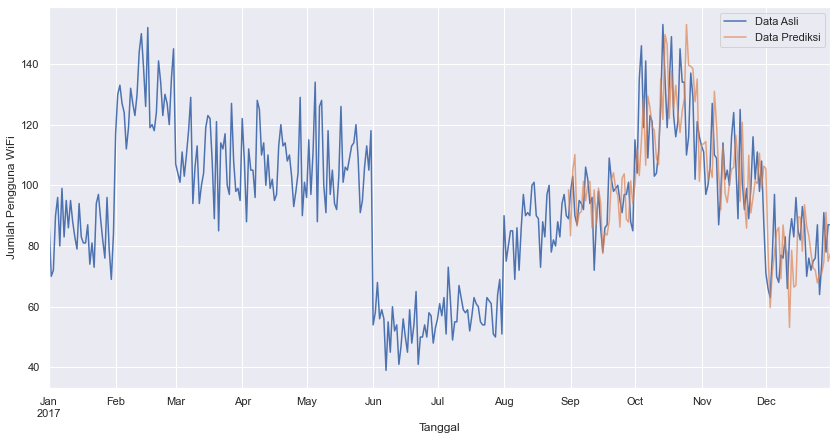

In [78]:
pred = hasil.get_prediction(start=pd.to_datetime('2017-08-31'), dynamic=False) 
y['2017':].plot(label='Data Asli') 
pred.predicted_mean.plot(label='Data Prediksi', alpha=.7, figsize=(14, 7)) 
plt.xlabel('Tanggal') 
plt.ylabel('Jumlah Pengguna WiFi') 
plt.legend() 
plt.show()

#### Prediksi untuk bulan Januari 2018

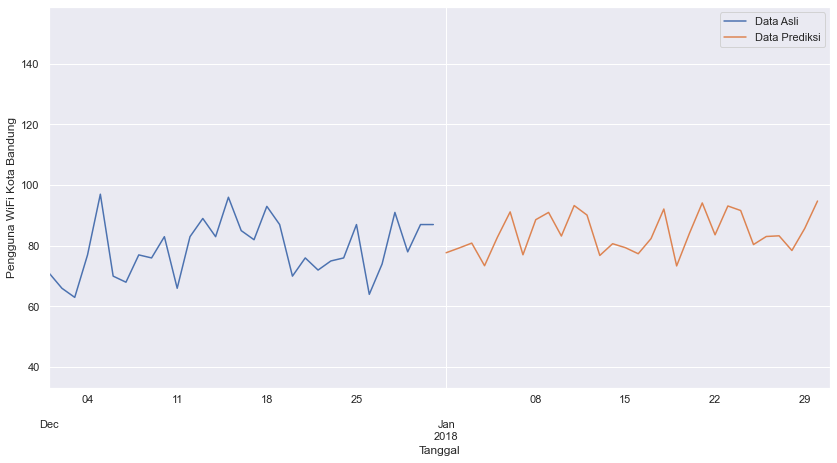

In [79]:
import datetime 
pred_uc = hasil.get_forecast(steps=30) 
y['2017':].plot(label='Data Asli', figsize=(14, 7)) 
pred_uc.predicted_mean.plot(label='Data Prediksi') 
plt.xlabel('Tanggal') 
plt.ylabel('Pengguna WiFi Kota Bandung') 
plt.xlim([datetime.date(2017, 12, 1), 
          datetime.date(2018, 1, 31)]) 
plt.legend() 
plt.show()

In [80]:
print("Jumlah Pengguna WiFi bulan Januari 2018",round(sum(pred_uc.predicted_mean)),"orang")

Jumlah Pengguna WiFi bulan Januari 2018 2523 orang
